['X396.332_2.991']
['Organic nitrogen compounds']
{'X396.332_2.991': 'Organic nitrogen compounds'}


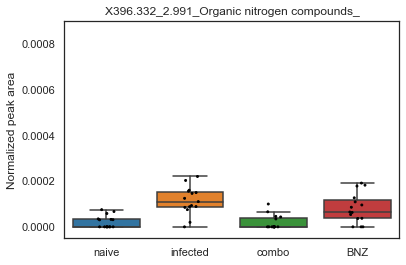

In [1]:

import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plot the mass in random forest file
meta_data = pandas.read_csv('LVB-metadata-feature-table.csv')
full_classes = pandas.read_csv("LVB-396dot332-annotation.csv")
classes_matches = full_classes[full_classes["classes"].isin(['Benzenoids',
                                                             'Organic acids and derivatives', 
                                                             'Lipids and lipid-like molecules',
                                                             'Organoheterocyclic compounds',
                                                             'Nucleosides, nucleotides, and analogues',
                                                             'Phenylpropanoids and polyketides', 
                                                             'Organic nitrogen compounds',
                                                             'Organic oxygen compounds'])]

mass_list = classes_matches.filename.to_list()
class_list = classes_matches.classes.to_list()
annotation_list = classes_matches.annotation.to_list()
features_class_dic = dict(zip(mass_list,class_list))
features_annotation_dic = dict(zip(mass_list,annotation_list))


print(mass_list)
print(class_list)
print(features_class_dic)

# change the theme tof the plot
sns.set_theme(style="white")

mass_list_number = 1
for mass in mass_list:
    fig1, ax1 = plt.subplots()
    ax1.set_title(mass + "_" + features_class_dic[mass] + "_")
    g = sns.boxplot(y=meta_data[str(mass)] , x=meta_data['Treatmentgroup'], palette="tab10", showfliers = False)
    g = sns.stripplot(y=meta_data[str(mass)] , x=meta_data['Treatmentgroup'], color = "black", size=2, edgecolor="black", linewidth=.9)
    ax1.set_xlabel('')
    ax1.set_ylabel('Normalized peak area')
    ax1.set_ylim([-0.00005, 0.0009])
    plt.savefig("LVB_boxplot_396dot332_" + str(mass_list_number) + "_" + str(mass) + "_" + ".png", dpi=300, bbox_inches='tight')
    mass_list_number += 1
